In [91]:
# import relevant libraries

import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns
import math

import warnings

In [92]:
# set options
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [93]:
# read clean Open 2019 dataset
df_19 = pd.read_csv('./data/2019_opens_clean.csv')

In [95]:
df_19 = df_19.loc[:, ~df_19.columns.str.contains('^Unnamed')]

In [96]:
df_19.head()

,competitorid,firstname,lastname,gender,countryoforigincode,affiliateid,affiliatename,age,height,weight,overallrank,overallscore,is_scaled,division,rank_1,rank_2,rank_3,rank_4,rank_5,time_1,time_2,time_3,time_4,time_5,scaled_1,scaled_2,scaled_3,scaled_4,scaled_5,score_1,score_2,score_3,score_4,score_5,bs_backsquat,bs_cleanandjerk,bs_snatch,bs_deadlift,bs_fightgonebad,bs_maxpull_ups,bs_fran,bs_grace,bs_helen,bs_filthy50,bs_sprint400m,bs_run5k,w1_reps_total,w1_reps_wbs,w1_cals_row,w1_rounds_completed,w2_reps_total,w2_reps_t2b,w2_reps_du,w2_reps_sqcl,w2_rounds_completed,w2_tiebreak,w3_reps_total,w3_5ft_reps_ohl,w3_reps_dbbsu,w3_reps_hspu,w3_hspu_status,w3_5ft_reps_hsw,w3_rounds_completed,w3_tiebreak,w4_reps_total,w4_reps_sn,w4_reps_bp,w4_reps_bmu,w4_bmu_status,w4_rounds_completed,w4_tiebreak,w5_reps_total,w5_reps_thr,w5_reps_c2bpu,w5_rounds_completed,BMI
0,86,Justin,Bergh,M,US,19273,CrossFit HQ,37.0,1.96,102.06,53022,304948,0,Men (35-39),15232,58534,59298,85576,86308,900.0,480.0,600.0,720.0,1200.0,0,0,0,0,0,13040000,11670764,10980237,10720255,11350000,151.0,120.0,95.0,188.0,393.0,32.0,226.0,174.0,496.0,1287.0,64.0,1325.0,304.0,152.0,152.0,8.00,167.0,50.0,100.0,17.0,1.88,436.0,98.0,40.0,50.0,8.0,1.0,0.0,2.16,363.0,72.0,30.0,36.0,6.0,1.0,1.09,465.0,135.0,75.0,60.0,2.36,26.567055
1,88,Cary,Hair,M,US,625,CrossFit Santa Cruz,34.0,1.83,86.64,4361,37192,0,Men,5891,5456,7199,13060,5586,900.0,720.0,600.0,720.0,882.0,0,0,0,0,0,13240000,12620599,11330328,11170505,12100318,206.0,142.0,120.0,234.0,407.0,54.0,140.0,109.0,448.0,1103.0,54.0,1294.0,324.0,171.0,153.0,8.53,262.0,75.0,150.0,37.0,2.98,601.0,133.0,40.0,50.0,43.0,1.0,0.0,2.86,NaN,117.0,30.0,60.0,27.0,1.0,1.77,215.0,210.0,105.0,105.0,5.00,25.871182
2,92,Tim,Chan,M,US,20635,CrossFit SoCal,49.0,1.68,73.03,117405,564929,0,Men (45-49),155079,102548,127946,76177,103179,900.0,480.0,600.0,720.0,1200.0,0,0,0,0,0,11710000,11021027,10510000,10770250,11090000,102.0,92.0,70.0,138.0,NaN,35.0,262.0,281.0,645.0,1661.0,NaN,NaN,171.0,95.0,76.0,4.50,102.0,37.0,50.0,15.0,1.14,173.0,51.0,40.0,11.0,0.0,0.0,0.0,1.22,600.0,77.0,30.0,37.0,10.0,1.0,1.17,470.0,109.0,60.0,49.0,1.80,25.875142
3,93,Leif,Edmundson,M,US,19273,CrossFit HQ,37.0,1.83,92.99,38765,237798,0,Men (35-39),50223,39468,78855,40425,28827,900.0,480.0,600.0,720.0,1200.0,0,0,0,0,0,12670000,11720803,10920171,10970472,12010000,138.0,106.0,83.0,161.0,403.0,45.0,220.0,154.0,493.0,1500.0,62.0,1239.0,267.0,134.0,133.0,7.03,172.0,50.0,100.0,22.0,1.93,397.0,92.0,40.0,50.0,2.0,1.0,0.0,2.04,429.0,97.0,30.0,48.0,19.0,1.0,1.47,248.0,201.0,105.0,96.0,4.50,27.767327
4,1617,John,Mclaughlin,M,US,4896,CrossFit Palm Beach,51.0,1.78,84.82,12050,89855,0,Men (50-54),12686,26138,26923,13629,10479,900.0,480.0,600.0,720.0,999.0,0,0,0,0,0,13080000,11760858,11130242,11170482,12100201,161.0,115.0,88.0,197.0,NaN,50.0,146.0,154.0,444.0,NaN,NaN,NaN,308.0,156.0,152.0,8.11,176.0,50.0,100.0,26.0,1.98,342.0,113.0,40.0,50.0,23.0,1.0,0.0,2.46,358.0,117.0,30.0,60.0,27.0,1.0,1.77,238.0,210.0,105.0,105.0,5.00,26.770610


### Check distributions of missing data

In [98]:
import missingno as msno

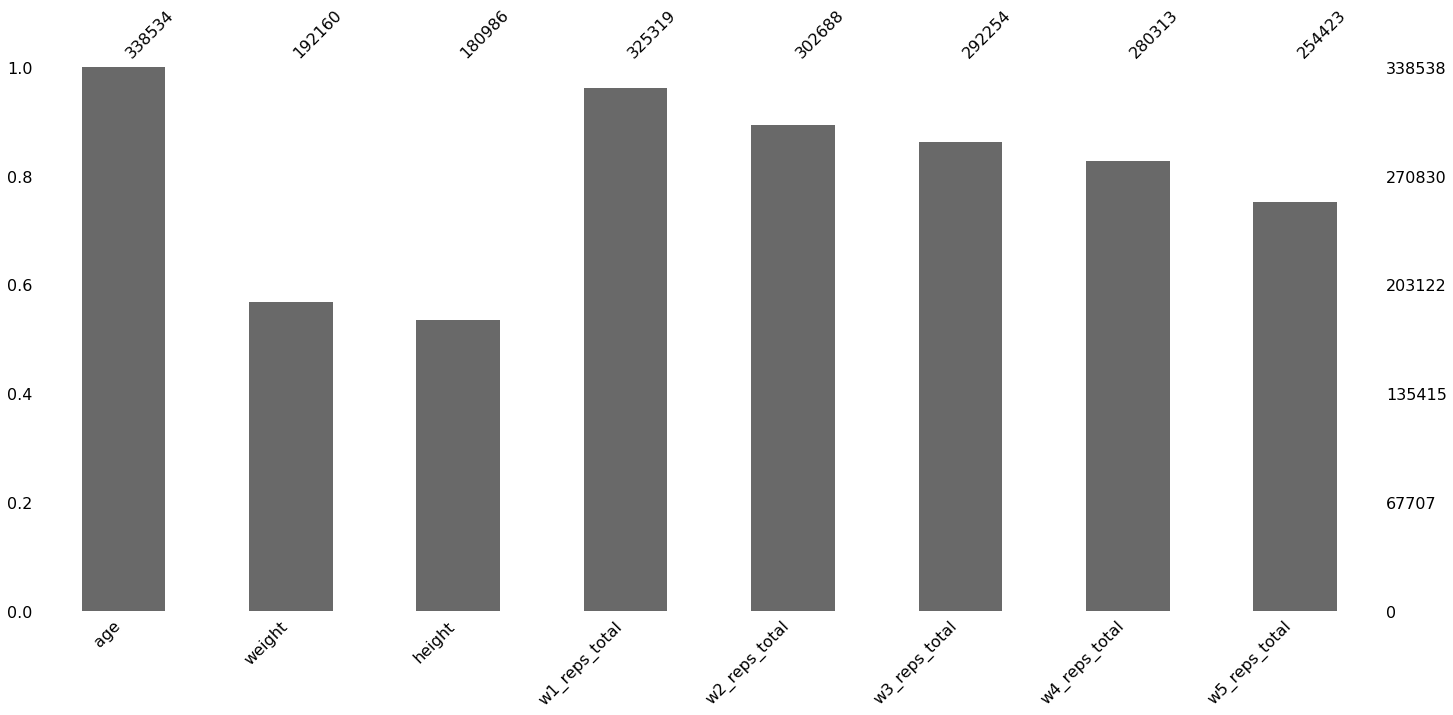

In [107]:
msno.bar(df_19[['age','weight','height','w1_reps_total','w2_reps_total','w3_reps_total','w4_reps_total','w5_reps_total']]);

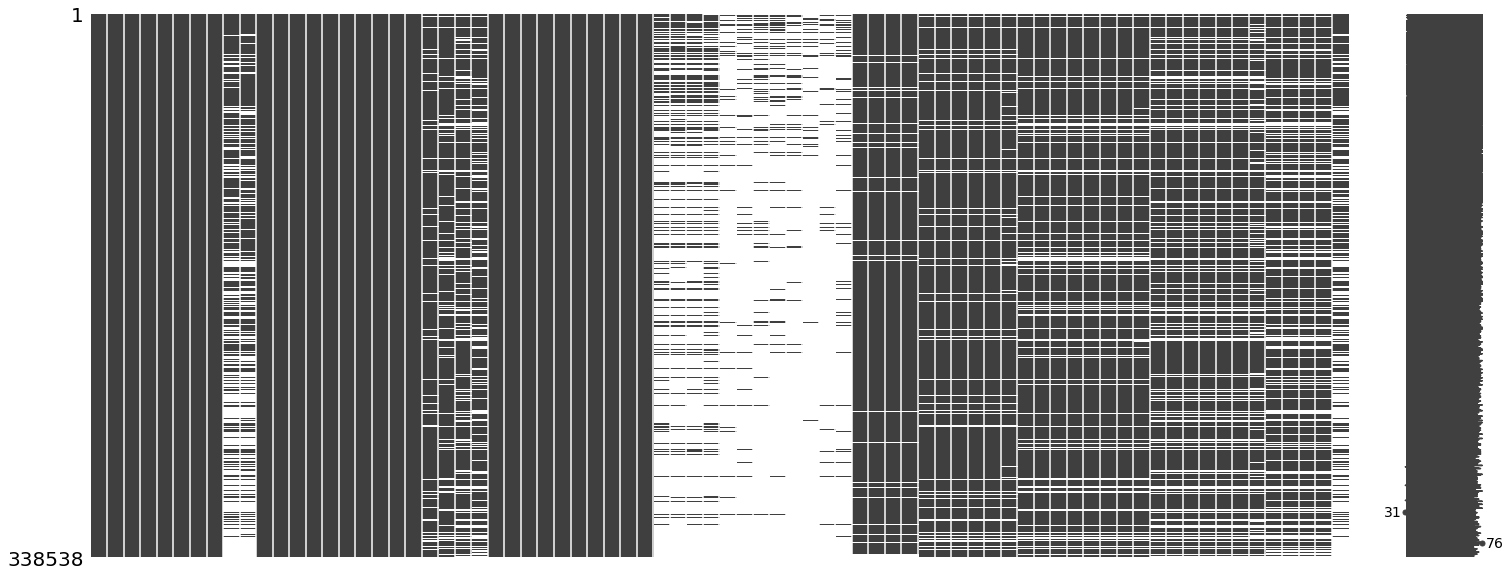

In [100]:
msno.matrix(df_19);
#msno.matrix(df_19[['age','weight','height','w1_reps_total','w2_reps_total','w3_reps_total','w4_reps_total','w5_reps_total']]);

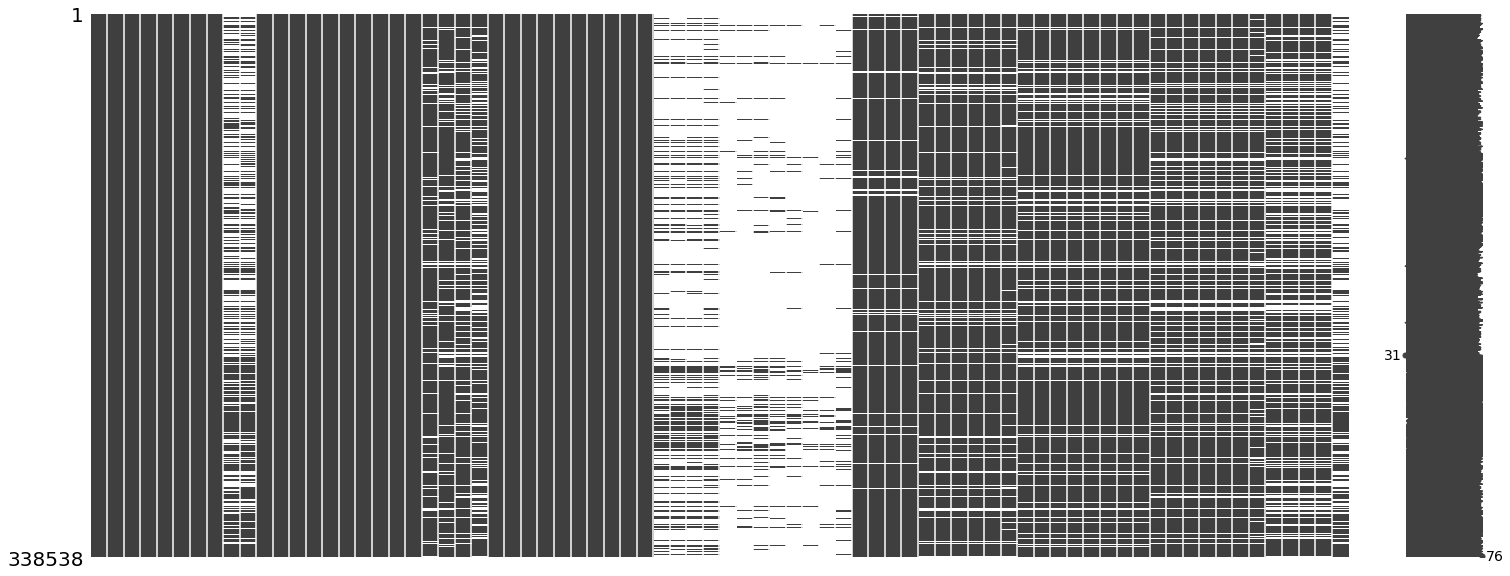

In [101]:
# sorted by gender (female above male)
#sorted = df_19[['gender','age','weight','height','w1_reps_total','w2_reps_total','w3_reps_total','w4_reps_total','w5_reps_total']].sort_values('gender')
sorted = df_19.sort_values('gender')
msno.matrix(sorted);

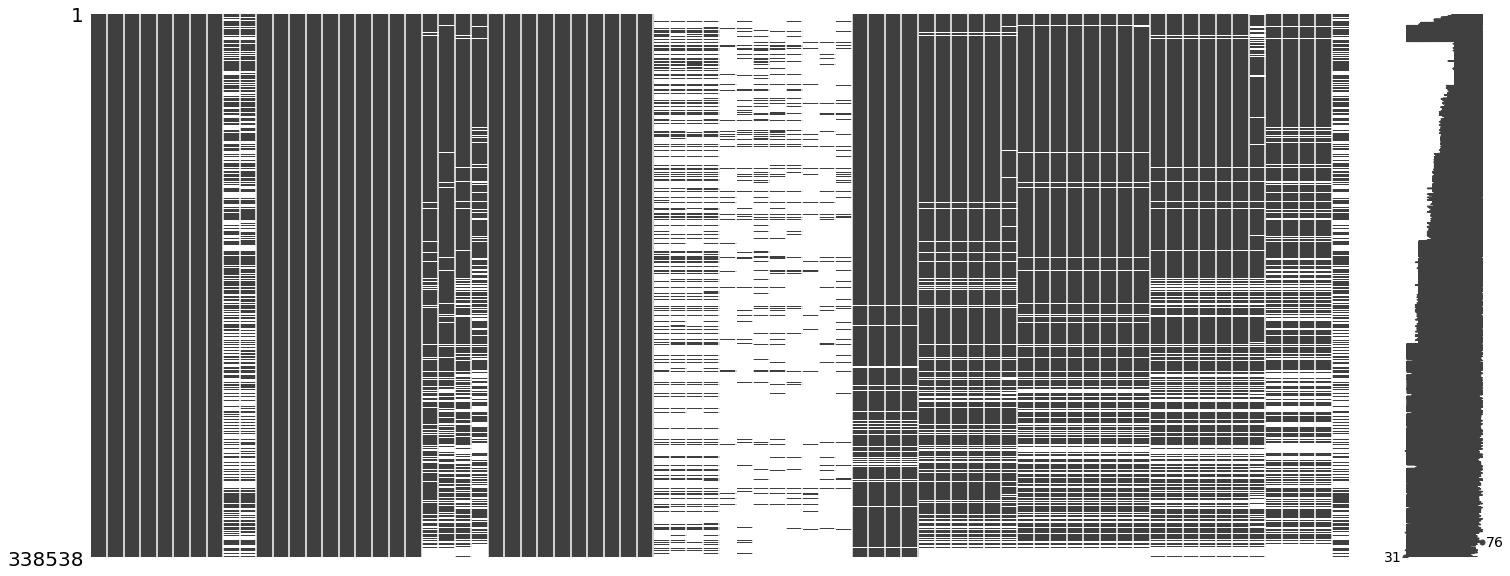

In [103]:
# sorted by overallscore (best athletes on top)
#sorted = df_19[['overallscore','age','weight','height','w1_reps_total','w2_reps_total','w3_reps_total','w4_reps_total','w5_reps_total']].sort_values('overallscore')
sorted = df_19.sort_values('overallscore')
msno.matrix(sorted);

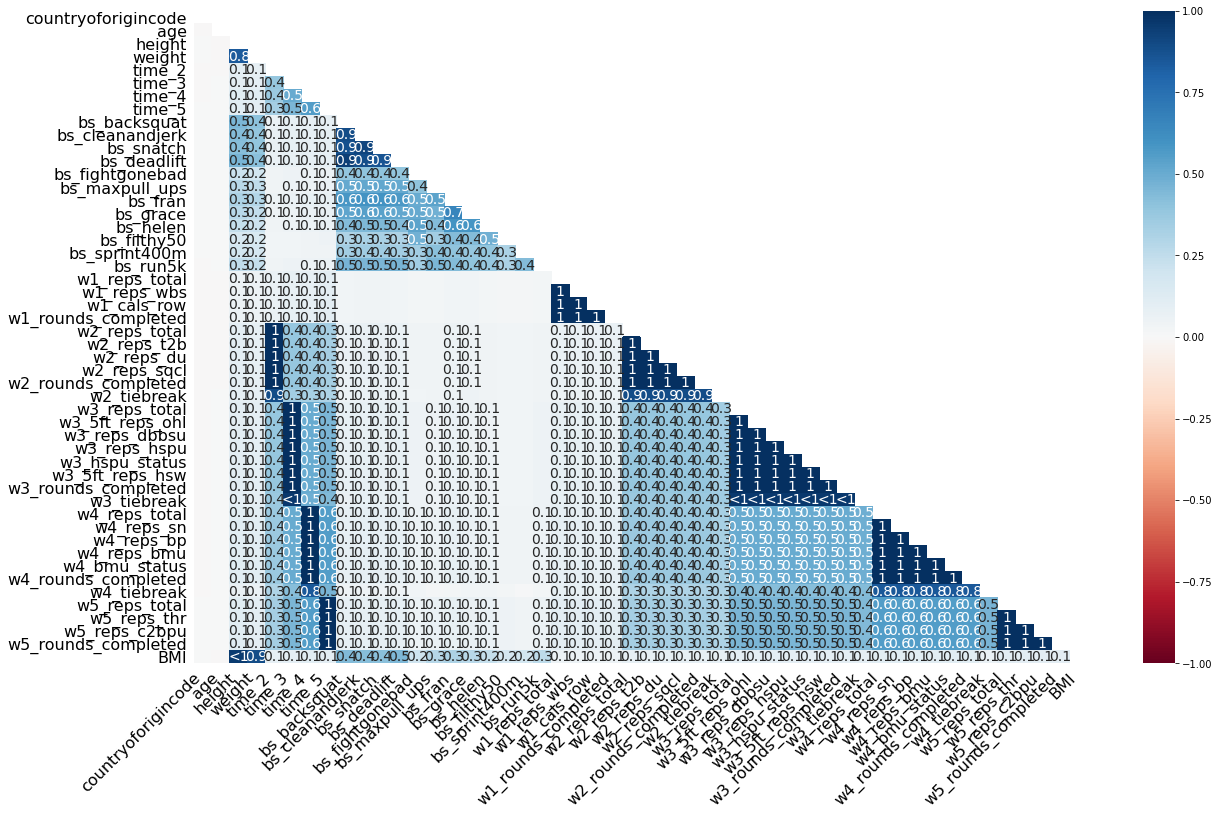

In [105]:
msno.heatmap(df_19);

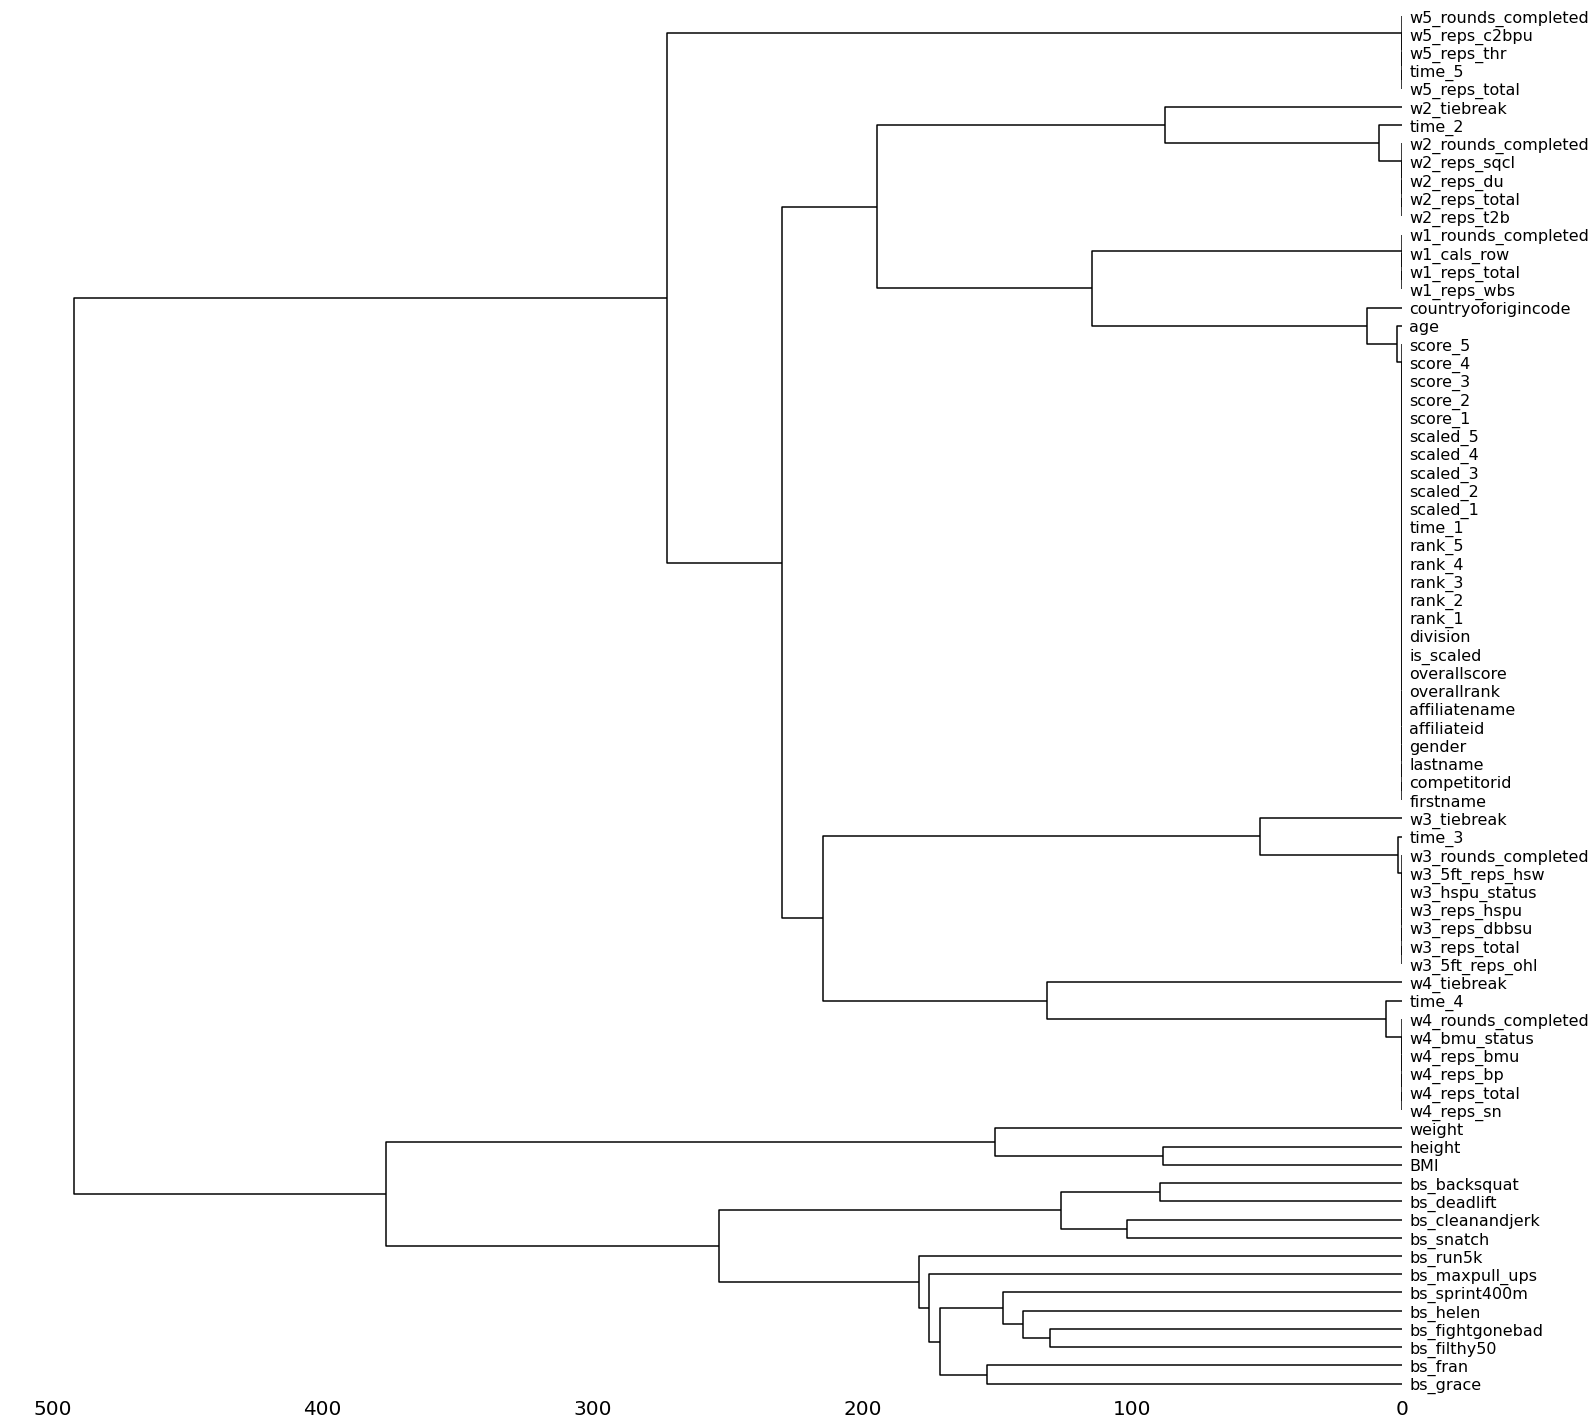

In [106]:
msno.dendrogram(df_19);

In [108]:
pd.set_option('display.max_rows', None)
df_19.isnull().sum()

competitorid                0
firstname                   0
lastname                    0
gender                      0
countryoforigincode       172
affiliateid                 0
affiliatename               0
age                         4
height                 157552
weight                 146378
overallrank                 0
overallscore                0
is_scaled                   0
division                    0
rank_1                      0
rank_2                      0
rank_3                      0
rank_4                      0
rank_5                      0
time_1                      0
time_2                  35923
time_3                  46287
time_4                  58262
time_5                  84115
scaled_1                    0
scaled_2                    0
scaled_3                    0
scaled_4                    0
scaled_5                    0
score_1                     0
score_2                     0
score_3                     0
score_4                     0
score_5   

There are just 4 observations with missing or senseless age data. Thus, those observations can be dropped.
Most of height and weight data is missing or senseless. Let's create two new features with 0/1 for missing / not missing status and check for correlations between other features.

In [109]:
height_list = df_19['height'].to_list()
weight_list = df_19['weight'].to_list()

w1_reps_total_list = df_19['w1_reps_total'].to_list()
w2_reps_total_list = df_19['w2_reps_total'].to_list()
w3_reps_total_list = df_19['w3_reps_total'].to_list()
w4_reps_total_list = df_19['w4_reps_total'].to_list()
w5_reps_total_list = df_19['w5_reps_total'].to_list()

In [110]:
height_status = []
for i in height_list:
    if math.isnan(i):
        height_status.append(0)
    else:
        height_status.append(1)
        
weight_status = []
for i in weight_list:
    if math.isnan(i):
        weight_status.append(0)
    else:
        weight_status.append(1)

In [111]:
w1_status = []
for i in w1_reps_total_list:
    if math.isnan(i):
        w1_status.append(0)
    else:
        w1_status.append(1)
        
w2_status = []
for i in w2_reps_total_list:
    if math.isnan(i):
        w2_status.append(0)
    else:
        w2_status.append(1)

w3_status = []
for i in w3_reps_total_list:
    if math.isnan(i):
        w3_status.append(0)
    else:
        w3_status.append(1)

w4_status = []
for i in w4_reps_total_list:
    if math.isnan(i):
        w4_status.append(0)
    else:
        w4_status.append(1)
        
w5_status = []
for i in w5_reps_total_list:
    if math.isnan(i):
        w5_status.append(0)
    else:
        w5_status.append(1)

In [112]:
df_19['height_status'] = height_status
df_19['weight_status'] = weight_status

df_19['w1_status'] = w1_status
df_19['w2_status'] = w2_status
df_19['w3_status'] = w3_status
df_19['w4_status'] = w4_status
df_19['w5_status'] = w5_status

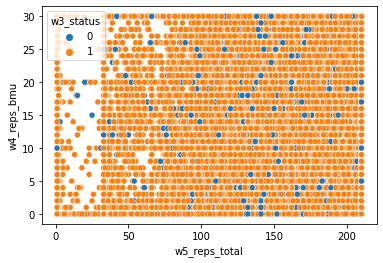

In [113]:
sns.scatterplot(data=df_19, x='w5_reps_total', y='w4_reps_bmu', hue='w3_status');

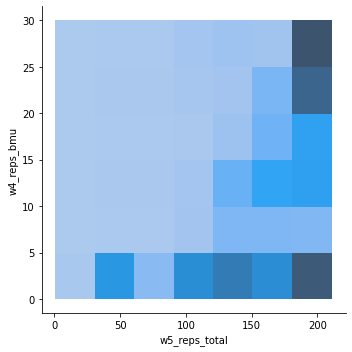

In [114]:
sns.displot(data=df_19, x='w5_reps_total', y='w4_reps_bmu', binwidth=(30,5));

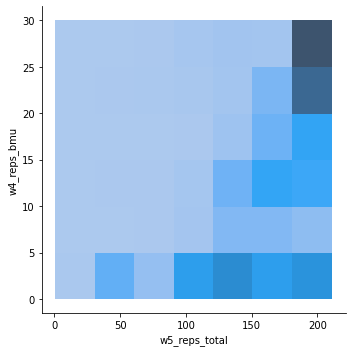

In [115]:
sns.displot(data=df_19[df_19['weight_status']==1], x='w5_reps_total', y='w4_reps_bmu', binwidth=(30,5));

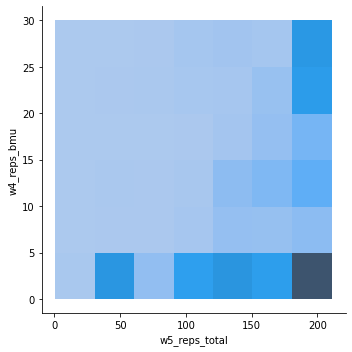

In [116]:
sns.displot(data=df_19[df_19['weight_status']==0], x='w5_reps_total', y='w4_reps_bmu', binwidth=(30,5));

### Check for Bar MU ability

In [43]:
w4_reps_bmu_list = df_19['w4_reps_bmu'].to_list()

In [44]:
bmu_status = []
for i in w4_reps_bmu_list:
    if i > 0:
        bmu_status.append(1)
    else:
        bmu_status.append(0)

In [47]:
df_19['bmu_status'] = bmu_status

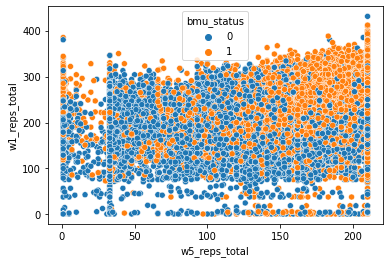

In [48]:
sns.scatterplot(data=df_19, x='w5_reps_total', y='w1_reps_total', hue='bmu_status');